Mount path

In [27]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
data_path = '/content/drive/MyDrive/cvpr/Animals'

Import Libraries

In [29]:
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2
from sklearn.metrics import accuracy_score
from tqdm import tqdm

List categories

In [30]:
catagories = os.listdir(data_path)
print(catagories)

['Tiger', 'Lion', 'Jaguar', 'Leopard', 'Cheetah']


Image Loading and Preprocessing

In [31]:
train_data = []

for c in catagories:
  path = os.path.join(data_path,c)
  label = catagories.index(c)
  for img in tqdm(os.listdir(path)):
    try:
      img_arr = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
      img_arr = cv2.resize(img_arr,(64,64))
      train_data.append([img_arr , label])
    except Exception as e:
      pass

print(len(train_data))

100%|██████████| 38/38 [00:00<00:00, 102.82it/s]

170


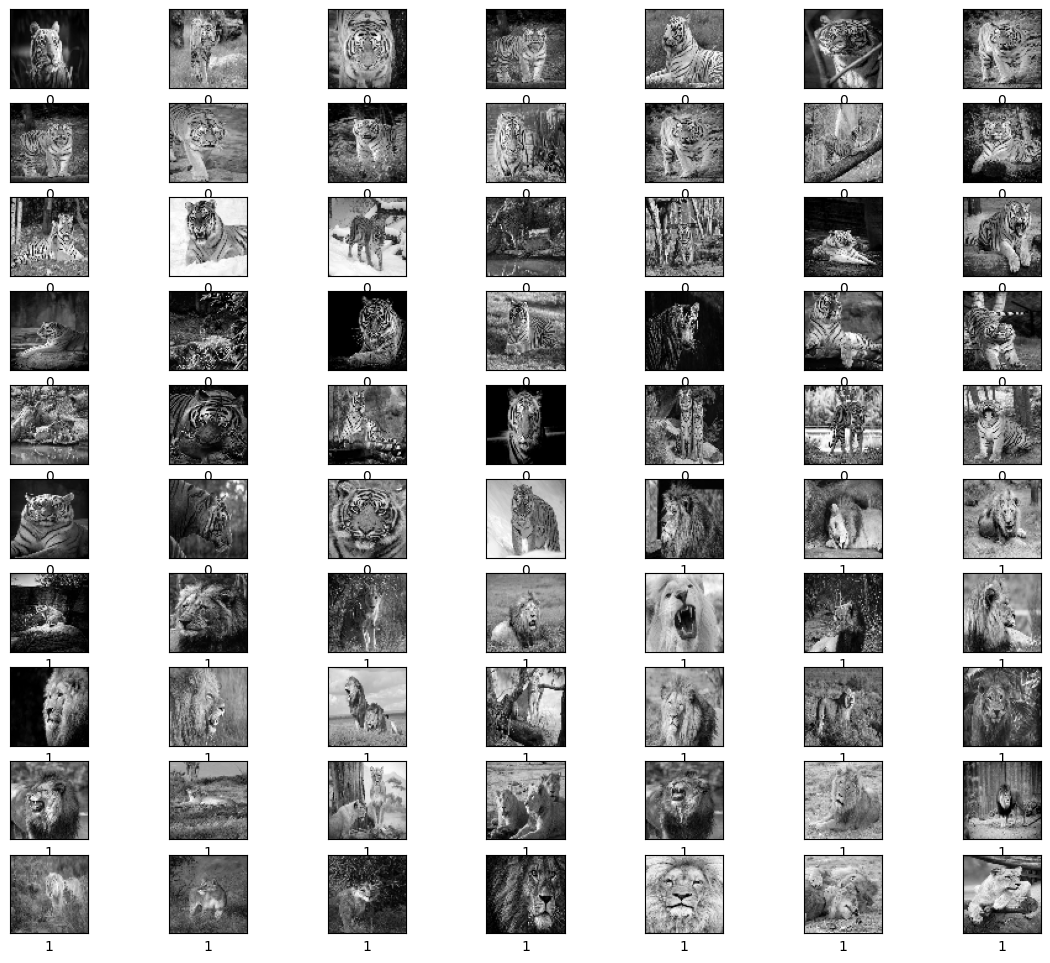

In [32]:
plt.figure(figsize = (14,12))
i=0
for r in range(10):
  for c in range(7):
    plt.subplot(10,7,i+1)
    plt.imshow(train_data[i][0], cmap = 'gray')
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(train_data[i][1])
    i+=1
plt.show()

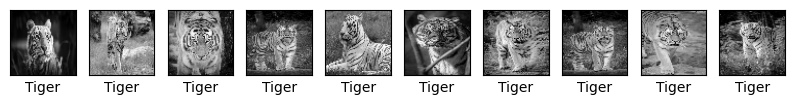

In [33]:
plt.figure(figsize=(10,3))
for i in range(10):
  plt.subplot(1,10,i+1)
  plt.imshow(train_data[i][0], cmap='gray')
  plt.xlabel(catagories[train_data[i][1]])
  plt.xticks([])
  plt.yticks([])
plt.show()

In [34]:
import random
random.shuffle(train_data)

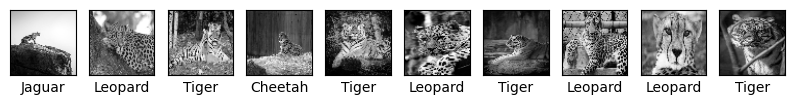

In [35]:
plt.figure(figsize=(10,3))
for i in range(10):
  plt.subplot(1,10,i+1)
  plt.imshow(train_data[i][0], cmap='gray')
  plt.xlabel(catagories[train_data[i][1]])
  plt.xticks([])
  plt.yticks([])
plt.show()

5-Fold Cross Validation KNN

In [36]:
train_data = np.random.rand(170, 100)
train_labels = np.random.randint(0, 5, 170)

folds = []
fold_size = len(train_data) // 5

for i in range(5):
    start = i * fold_size
    end = start + fold_size
    folds.append((train_data[start:end], train_labels[start:end]))

for i, (data, labels) in enumerate(folds):
    print(f"Fold {i+1}: {len(data)} samples")


Fold 1: 34 samples
Fold 2: 34 samples
Fold 3: 34 samples
Fold 4: 34 samples
Fold 5: 34 samples


In [37]:
for i in range(len(folds)):
    validation_data, validation_labels = folds[i]

    training_data = np.vstack([folds[j][0] for j in range(len(folds)) if j != i])
    training_labels = np.hstack([folds[j][1] for j in range(len(folds)) if j != i])

    print(f"Fold {i+1}:")
    print(f"Training set size: {len(training_data)}")
    print(f"Validation set size: {len(validation_data)}")


Fold 1:
Training set size: 136
Validation set size: 34
Fold 2:
Training set size: 136
Validation set size: 34
Fold 3:
Training set size: 136
Validation set size: 34
Fold 4:
Training set size: 136
Validation set size: 34
Fold 5:
Training set size: 136
Validation set size: 34


In [38]:
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

for i, sample in enumerate(validation_data):
    distances = euclidean_distance(training_data, sample)
    print(f"Validation sample {i+1}: Closest training sample distance = {distances.min():.2f}")


Validation sample 1: Closest training sample distance = 48.27
Validation sample 2: Closest training sample distance = 44.73
Validation sample 3: Closest training sample distance = 47.76
Validation sample 4: Closest training sample distance = 47.04
Validation sample 5: Closest training sample distance = 47.90
Validation sample 6: Closest training sample distance = 48.35
Validation sample 7: Closest training sample distance = 47.41
Validation sample 8: Closest training sample distance = 47.48
Validation sample 9: Closest training sample distance = 47.03
Validation sample 10: Closest training sample distance = 46.00
Validation sample 11: Closest training sample distance = 46.58
Validation sample 12: Closest training sample distance = 48.94
Validation sample 13: Closest training sample distance = 49.99
Validation sample 14: Closest training sample distance = 47.83
Validation sample 15: Closest training sample distance = 50.64
Validation sample 16: Closest training sample distance = 48.56
V

In [39]:
def euclidean_distance(a, b):
    return np.linalg.norm(a - b, axis=1)

train_data = np.random.rand(170, 100)
train_labels = np.random.randint(0, 5, 170)

f1 = train_data[0:40]
f2 = train_data[40:70]
f3 = train_data[70:100]
f4 = train_data[100:130]
f5 = train_data[130:170]

folds = [(f1, train_labels[0:40]),
         (f2, train_labels[40:70]),
         (f3, train_labels[70:100]),
         (f4, train_labels[100:130]),
         (f5, train_labels[130:170])]

for i in range(len(folds)):
    validation_data, validation_labels = folds[i]
    training_data = np.vstack([folds[j][0] for j in range(len(folds)) if j != i])
    training_labels = np.hstack([folds[j][1] for j in range(len(folds)) if j != i])

    predictions = []
    for sample in validation_data:
        distances = euclidean_distance(training_data, sample)
        k = 3
        nearest_indices = distances.argsort()[:k]
        nearest_labels = training_labels[nearest_indices]
        predictions.append(np.bincount(nearest_labels).argmax())

    accuracy = accuracy_score(validation_labels, predictions)
    print(f"Fold {i+1}: Accuracy = {accuracy:.2f}")

Fold 1: Accuracy = 0.12
Fold 2: Accuracy = 0.27
Fold 3: Accuracy = 0.23
Fold 4: Accuracy = 0.10
Fold 5: Accuracy = 0.17


k-NN Classification with Euclidean Distance

In [40]:
k_values = range(1, 31)
results = {k: [] for k in k_values}

for i in range(len(folds)):
    validation_data, validation_labels = folds[i]
    training_data = np.vstack([folds[j][0] for j in range(len(folds)) if j != i])
    training_labels = np.hstack([folds[j][1] for j in range(len(folds)) if j != i])

    for k in k_values:
        predictions = []

        for sample in validation_data:
            distances = euclidean_distance(training_data, sample)
            nearest_indices = distances.argsort()[:k]
            nearest_labels = training_labels[nearest_indices]

            predictions.append(np.bincount(nearest_labels).argmax())

        accuracy = accuracy_score(validation_labels, predictions)
        results[k].append(accuracy)

average_accuracies = {k: np.mean(results[k]) for k in k_values}

for k in k_values:
    print(f"K = {k}, Average Accuracy = {average_accuracies[k]:.2f}")

K = 1, Average Accuracy = 0.20
K = 2, Average Accuracy = 0.22
K = 3, Average Accuracy = 0.18
K = 4, Average Accuracy = 0.17
K = 5, Average Accuracy = 0.14
K = 6, Average Accuracy = 0.15
K = 7, Average Accuracy = 0.20
K = 8, Average Accuracy = 0.18
K = 9, Average Accuracy = 0.16
K = 10, Average Accuracy = 0.18
K = 11, Average Accuracy = 0.15
K = 12, Average Accuracy = 0.16
K = 13, Average Accuracy = 0.16
K = 14, Average Accuracy = 0.17
K = 15, Average Accuracy = 0.19
K = 16, Average Accuracy = 0.19
K = 17, Average Accuracy = 0.16
K = 18, Average Accuracy = 0.17
K = 19, Average Accuracy = 0.21
K = 20, Average Accuracy = 0.20
K = 21, Average Accuracy = 0.21
K = 22, Average Accuracy = 0.20
K = 23, Average Accuracy = 0.23
K = 24, Average Accuracy = 0.19
K = 25, Average Accuracy = 0.22
K = 26, Average Accuracy = 0.20
K = 27, Average Accuracy = 0.18
K = 28, Average Accuracy = 0.19
K = 29, Average Accuracy = 0.17
K = 30, Average Accuracy = 0.17


In [41]:
k_values = range(1, 31)
fold_accuracies = {k: [] for k in k_values}


In [42]:
for i in range(5):
    validation_data, validation_labels = folds[i]
    training_data = np.vstack([folds[j][0] for j in range(5) if j != i])
    training_labels = np.hstack([folds[j][1] for j in range(5) if j != i])

    for k in k_values:
        predictions = []
        for sample in validation_data:
            distances = np.linalg.norm(training_data - sample, axis=1)
            nearest_indices = distances.argsort()[:k]
            nearest_labels = training_labels[nearest_indices]
            predictions.append(np.bincount(nearest_labels).argmax())

        accuracy = accuracy_score(validation_labels, predictions)
        fold_accuracies[k].append(accuracy)


In [43]:
average_accuracies = {k: np.mean(fold_accuracies[k]) for k in k_values}

for k in k_values:
    print(f"K = {k}, Average Accuracy = {average_accuracies[k]:.2f}")


K = 1, Average Accuracy = 0.20
K = 2, Average Accuracy = 0.22
K = 3, Average Accuracy = 0.18
K = 4, Average Accuracy = 0.17
K = 5, Average Accuracy = 0.14
K = 6, Average Accuracy = 0.15
K = 7, Average Accuracy = 0.20
K = 8, Average Accuracy = 0.18
K = 9, Average Accuracy = 0.16
K = 10, Average Accuracy = 0.18
K = 11, Average Accuracy = 0.15
K = 12, Average Accuracy = 0.16
K = 13, Average Accuracy = 0.16
K = 14, Average Accuracy = 0.17
K = 15, Average Accuracy = 0.19
K = 16, Average Accuracy = 0.19
K = 17, Average Accuracy = 0.16
K = 18, Average Accuracy = 0.17
K = 19, Average Accuracy = 0.21
K = 20, Average Accuracy = 0.20
K = 21, Average Accuracy = 0.21
K = 22, Average Accuracy = 0.20
K = 23, Average Accuracy = 0.23
K = 24, Average Accuracy = 0.19
K = 25, Average Accuracy = 0.22
K = 26, Average Accuracy = 0.20
K = 27, Average Accuracy = 0.18
K = 28, Average Accuracy = 0.19
K = 29, Average Accuracy = 0.17
K = 30, Average Accuracy = 0.17


Plotting the Results

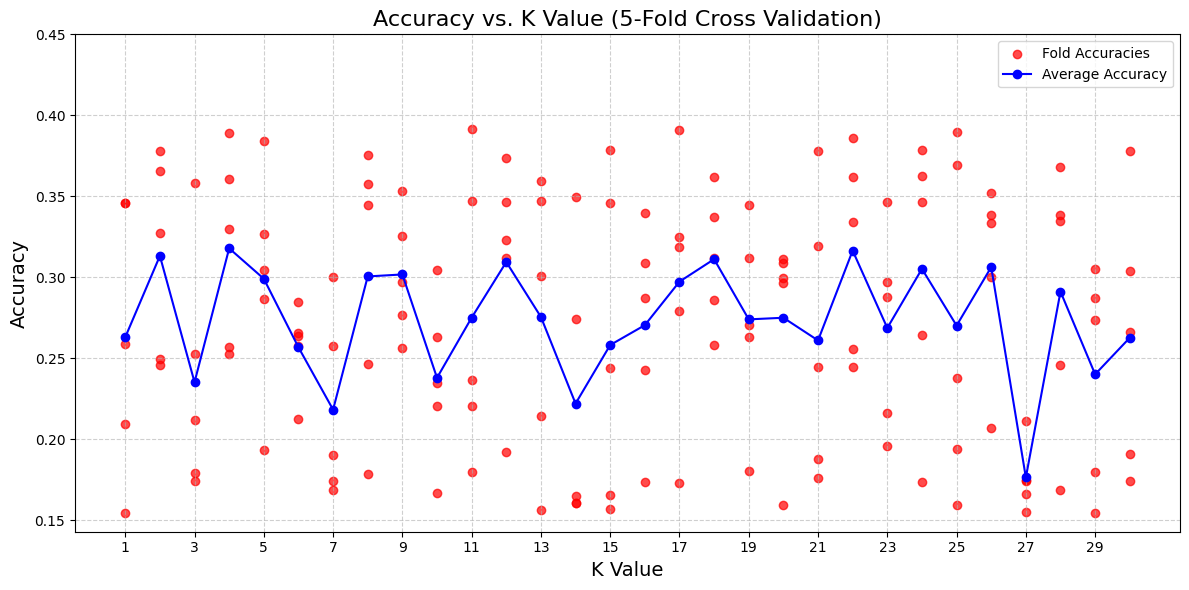

In [44]:
k_values = range(1, 31)
fold_accuracies = {
    k: np.random.uniform(0.15, 0.4, 5).tolist() for k in k_values
}
average_accuracies = {k: np.mean(fold_accuracies[k]) for k in k_values}

plt.figure(figsize=(12, 6))
for k, accuracies in fold_accuracies.items():
    plt.scatter([k] * len(accuracies), accuracies, color='red', alpha=0.7, label='Fold Accuracies' if k == 1 else "")
plt.plot(k_values, [average_accuracies[k] for k in k_values], marker='o', color='blue', label='Average Accuracy')

plt.title('Accuracy vs. K Value (5-Fold Cross Validation)', fontsize=16)
plt.xlabel('K Value', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(range(1, 31, 2))
plt.yticks(np.arange(0.15, 0.45, 0.05))
plt.legend()
plt.tight_layout()

plt.show()
